# **PROBLEMA DE NEGOCIO**

La necesidad de prever y optimizar el gasto de sus usuarios ha llevado a una empresa de comercio electrónico a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para desarrollar un modelo de machine learning que pueda predecir con precisión cuánto gastará un usuario al visitar dicho sitio web.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Importar correctamente y analizar y comprender el conjunto de datos proporcionado, realizar limpieza de datos, eliminar atributos que no aportan valor y manejar valores faltantes.

**2. Exploración y Feature Engineering:** Realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes, identificar variables llaves, codificación de variables categóricas y normalización/escalado de datos.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Linear Regression, Decision Tree Regressor, Random Forest Regressor, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como el error cuadrático medio (MSE), la raíz cuadrada del error cuadrático medio (RMSE) y el coeficiente de determinación (R²). Seleccionar el modelo con el mejor rendimiento para la predicción del gasto de los usuarios.

# **1. Configuración del Ambiente**


---


In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import json
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
## Globalizando variables
global df_traffic, resultados, modelo, modelo_clasificacion

# **2. Preprocesamiento de Datos**


---

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_site.csv')

In [4]:
df_traffic = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_site.csv', dtype={'date':object,'fullVisitorId':object,'visitId':object})
df_traffic.sample(5)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
10987,Social,20170419,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",2552279245378235025,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",2552279245378235025_1492590290,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""referralPath"": ""/yt/about/ro/"", ""campaign"": ...",1492590290,1,1492590290
5361,Organic Search,20161002,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",5088388569606012967,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",5088388569606012967_1475454271,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1475454271,1,1475454271
3608,Direct,20170423,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",4943714929281620064,"{""continent"": ""Europe"", ""subContinent"": ""North...",4943714929281620064_1492951663,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1492951663,1,1492951663
1460,Organic Search,20170213,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",4414212477567783152,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",4414212477567783152_1487033026,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""24"", ""pageviews"": ""23...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1487033026,1,1487033026
3409,Organic Search,20170426,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",3974014428079149210,"{""continent"": ""Europe"", ""subContinent"": ""Weste...",3974014428079149210_1493210598,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1493210598,1,1493210598


In [5]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  object
 2   device                12283 non-null  object
 3   fullVisitorId         12283 non-null  object
 4   geoNetwork            12283 non-null  object
 5   sessionId             12283 non-null  object
 6   socialEngagementType  12283 non-null  object
 7   totals                12283 non-null  object
 8   trafficSource         12283 non-null  object
 9   visitId               12283 non-null  object
 10  visitNumber           12283 non-null  int64 
 11  visitStartTime        12283 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


In [6]:
# Crear función preprocesamiento
def preprocesamiento():
    global df_traffic, resultados, modelo, modelo_clasificacion
    df_traffic_copy = df_traffic.copy()
    
    diccionarios = ['device', 'geoNetwork', 'trafficSource', 'totals']
    
    for columna in diccionarios:
        df_traffic_copy = df_traffic_copy.join(json_normalize(df_traffic_copy[columna].apply(json.loads)))
    df_traffic_copy = df_traffic_copy.drop(columns=diccionarios)
    
    df_traffic_copy_start = df_traffic_copy.copy()
    
    for columna in df_traffic_copy.columns:
        # Verificar si la columna tiene un solo valor único
        if len(df_traffic_copy[columna].unique()) == 1:
            df_traffic_copy.drop(columns=[columna], inplace=True)
    
    df_traffic_copy.drop_duplicates(inplace=True)
    
    # Reemplazar textos por números en las columnas numéricas
    cuant = ['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']
    for columna in cuant:
        df_traffic_copy[columna] = pd.to_numeric(df_traffic_copy[columna], errors='coerce')
    
    # Reemplazar nulos por cero en las columnas numéricas
    cuant = ['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']
    for columna in cuant:
        df_traffic_copy[columna].fillna(0, inplace=True)
        
    # Dividir transactionRevenue por 1000000
    df_traffic_copy['transactionRevenue'] = df_traffic_copy['transactionRevenue'] / 1000000
    
    # Reemplazar números por fechas en las columnas correspondientes
    df_traffic_copy['date'] = pd.to_datetime(df_traffic_copy['date'], format='%Y%m%d')
    df_traffic_copy['visitStartTime'] = pd.to_datetime(df_traffic_copy['visitStartTime'], unit='s')
    
    return df_traffic_copy


In [7]:
df_traffic_copy_start = preprocesamiento().copy()

In [8]:
df_traffic_copy=preprocesamiento().copy()


In [9]:
df_traffic_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   channelGrouping                 12283 non-null  object        
 1   date                            12283 non-null  datetime64[ns]
 2   fullVisitorId                   12283 non-null  object        
 3   sessionId                       12283 non-null  object        
 4   visitId                         12283 non-null  object        
 5   visitNumber                     12283 non-null  int64         
 6   visitStartTime                  12283 non-null  datetime64[ns]
 7   browser                         12283 non-null  object        
 8   operatingSystem                 12283 non-null  object        
 9   isMobile                        12283 non-null  bool          
 10  deviceCategory                  12283 non-null  object        
 11  co

In [10]:
df_traffic_copy_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   channelGrouping                 12283 non-null  object        
 1   date                            12283 non-null  datetime64[ns]
 2   fullVisitorId                   12283 non-null  object        
 3   sessionId                       12283 non-null  object        
 4   visitId                         12283 non-null  object        
 5   visitNumber                     12283 non-null  int64         
 6   visitStartTime                  12283 non-null  datetime64[ns]
 7   browser                         12283 non-null  object        
 8   operatingSystem                 12283 non-null  object        
 9   isMobile                        12283 non-null  bool          
 10  deviceCategory                  12283 non-null  object        
 11  co

In [11]:
df_traffic_copy.sample(5)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
6063,Referral,2017-04-17,38653069906572885,38653069906572885_1492471565,1492471565,1,2017-04-17 23:26:05,Safari,iOS,True,mobile,Europe,Western Europe,France,Ile-de-France,(not set),Paris,unknown.unknown,(not set),support.google.com,referral,NaN,NaN,/youtube/forum/AAAAtMBnpzw3xfCBccRfq4/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
6336,Organic Search,2016-12-15,9142120481991080549,9142120481991080549_1481817590,1481817590,1,2016-12-15 15:59:50,Safari,iOS,True,tablet,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,10,0.0,1.0,0.0
3529,Organic Search,2017-04-29,6444049031959184377,6444049031959184377_1493481111,1493481111,1,2017-04-29 15:51:51,Chrome,Windows,False,desktop,Europe,Western Europe,Germany,Bavaria,(not set),Munich,mnet-online.de,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.0,1.0,0.0
9109,Paid Search,2016-08-15,4794806519550511408,4794806519550511408_1471276931,1471276931,1,2016-08-15 16:02:11,Chrome,iOS,True,tablet,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,riversongs.com,AW - Dynamic Search Ads Whole Site,google,cpc,6qEhsCssdK0z36ri,NaN,NaN,1,Top,CN2BjtLlw84CFUGSfgodZg4CWQ,Google Search,False,NaN,NaN,1,1,1.0,1.0,0.0
8314,Social,2017-01-24,936890469032270161,0936890469032270161_1485247807,1485247807,1,2017-01-24 08:50:07,Firefox,Macintosh,False,desktop,Asia,Western Asia,United Arab Emirates,not available in demo dataset,not available in demo dataset,not available in demo dataset,almalcapital.com,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0


In [12]:
for columna in df_traffic_copy.columns:
    print('========='*30)
    print(df_traffic_copy[columna].value_counts())

channelGrouping
Organic Search    5155
Social            3052
Direct            2011
Referral          1438
Paid Search        310
Affiliates         236
Display             77
(Other)              4
Name: count, dtype: int64
date
2016-10-04    70
2016-11-17    69
2016-11-29    67
2016-11-16    67
2016-11-30    65
              ..
2017-05-07    12
2016-12-24    12
2016-12-25    11
2017-04-30    10
2017-06-18    10
Name: count, Length: 366, dtype: int64
fullVisitorId
603373162136570069     24
7660377708313228942    24
5310912563447452038    20
3290805371994597664    20
4376572204985925602    19
                       ..
7917907532901038094     1
8260329816412564664     1
4641112779476898481     1
8031235139952469596     1
2905034275926274980     1
Name: count, Length: 9997, dtype: int64
sessionId
0085919192619182437_1497163986    2
1336534355295742450_1500188299    2
3992336687808087085_1489560370    2
079105537511603557_1491978481     2
7053760850731460997_1496300394    2
             

In [13]:
json_data = df_traffic[['device', 'geoNetwork', 'trafficSource', 'totals']]
json_data


,device,geoNetwork,trafficSource,totals
0,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...","{""continent"": ""Asia"", ""subContinent"": ""Southea...","{""campaign"": ""(not set)"", ""source"": ""google"", ...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",..."
1,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...","{""continent"": ""Europe"", ""subContinent"": ""Easte...","{""campaign"": ""(not set)"", ""source"": ""google"", ...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",..."
2,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...","{""continent"": ""Americas"", ""subContinent"": ""Sou...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",..."
3,"{""browser"": ""Safari"", ""browserVersion"": ""not a...","{""continent"": ""Americas"", ""subContinent"": ""Nor...","{""campaign"": ""(not set)"", ""source"": ""google"", ...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",..."
4,"{""browser"": ""Safari"", ""browserVersion"": ""not a...","{""continent"": ""Americas"", ""subContinent"": ""Nor...","{""campaign"": ""(not set)"", ""source"": ""google"", ...","{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",..."
...,...,...,...,...
12278,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...","{""continent"": ""Europe"", ""subContinent"": ""Easte...","{""referralPath"": ""/yt/about/pl/"", ""campaign"": ...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",..."
12279,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...","{""continent"": ""Europe"", ""subContinent"": ""Weste...","{""referralPath"": ""/yt/about/"", ""campaign"": ""(n...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",..."
12280,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...","{""continent"": ""Asia"", ""subContinent"": ""Souther...","{""referralPath"": ""/yt/about/"", ""campaign"": ""(n...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",..."
12281,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...","{""continent"": ""Europe"", ""subContinent"": ""North...","{""referralPath"": ""/yt/about/lt/"", ""campaign"": ...","{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2""}"


In [14]:
diccionarios = ['device', 'geoNetwork', 'trafficSource', 'totals']
    
for columna in diccionarios:
    json_data = json_data.join(json_normalize(json_data[columna].apply(json.loads)))
json_data = json_data.drop(columns=diccionarios)

In [15]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   browser                              12283 non-null  object
 1   browserVersion                       12283 non-null  object
 2   browserSize                          12283 non-null  object
 3   operatingSystem                      12283 non-null  object
 4   operatingSystemVersion               12283 non-null  object
 5   isMobile                             12283 non-null  bool  
 6   mobileDeviceBranding                 12283 non-null  object
 7   mobileDeviceModel                    12283 non-null  object
 8   mobileInputSelector                  12283 non-null  object
 9   mobileDeviceInfo                     12283 non-null  object
 10  mobileDeviceMarketingName            12283 non-null  object
 11  flashVersion                         1228

In [16]:
columns_target = [
    "subContinent", "region", "isTrueDirect", "adwordsClickInfo.page", "adwordsClickInfo.slot", "adwordsClickInfo.gclId", "adwordsClickInfo.adNetworkType", "adwordsClickInfo.isVideoAd", "campaignCode"
]

df_traffic_copy = df_traffic_copy.drop(columns=columns_target)

### Columnas que eliminaré por no aportar nada al modelo: subContinent,region, isTrueDirect, adwordsClickInfo.page, adwordsClickInfo.slot, adwordsClickInfo.gclId, adwordsClickInfo.adNetworkType, adwordsClickInfo.isVideoAd, campaignCode, ver análisis en EDA

In [17]:
df_traffic = df_traffic_copy.copy()

In [18]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   channelGrouping     12283 non-null  object        
 1   date                12283 non-null  datetime64[ns]
 2   fullVisitorId       12283 non-null  object        
 3   sessionId           12283 non-null  object        
 4   visitId             12283 non-null  object        
 5   visitNumber         12283 non-null  int64         
 6   visitStartTime      12283 non-null  datetime64[ns]
 7   browser             12283 non-null  object        
 8   operatingSystem     12283 non-null  object        
 9   isMobile            12283 non-null  bool          
 10  deviceCategory      12283 non-null  object        
 11  continent           12283 non-null  object        
 12  country             12283 non-null  object        
 13  metro               12283 non-null  object    

### Desarollo de Feature Engineering

In [ ]:
# Crear función para ingeniería de características
def feature_engineering():
    global df_traffic_copy, resultados, modelo, modelo_clasificacion
    df_traffic_copy = df_traffic.copy()
    
    # Crear algunas nuevas variables a partir del atributo 'date'
    df_traffic_copy['date'] = pd.to_datetime(df_traffic_copy['date'])  
    df_traffic_copy['year'] = df_traffic_copy['date'].dt.year
    df_traffic_copy['month'] = df_traffic_copy['date'].dt.month
    df_traffic_copy['quarterMonth'] = df_traffic_copy['date'].dt.quarter
    df_traffic_copy['day'] = df_traffic_copy['date'].dt.day
    df_traffic_copy['weekday'] = df_traffic_copy['date'].dt.weekday
    df_traffic_copy = df_traffic_copy.drop(columns=['date'])

    df_traffic_copy['visitStartTime'] = pd.to_datetime(df_traffic_copy['visitStartTime'])
    
    df_traffic_copy['time_range'] = pd.cut(df_traffic_copy['visitStartTime'].dt.hour, 
                                           bins=[0, 6, 12, 18, 24], 
                                           labels=['madrugada', 'mañana', 'tarde', 'noche'], 
                                           ordered=False).astype('object')
    
    # Eliminar columnas que no vamos a utilizar
    df_traffic_copy.drop(columns=['fullVisitorId', 'sessionId', 'visitId', 'visitStartTime'], inplace=True)
    
    # Aplicar LabelEncoder
    cualitativas = df_traffic_copy.dtypes[df_traffic_copy.dtypes == object].keys()
    for columna in cualitativas:
        lbl = LabelEncoder()
        strings = list(df_traffic_copy[columna].values.astype('str'))
        lbl.fit(strings)
        df_traffic_copy[columna] = lbl.transform(strings)
    
    return df_traffic_copy

In [ ]:
df_traffic_copy = feature_engineering().copy()
df_traffic_copy.info()

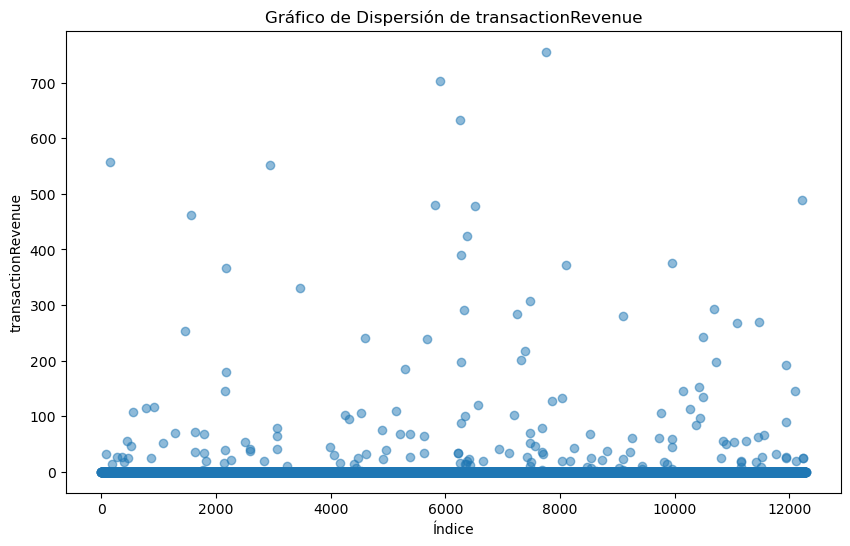

In [ ]:
# Grafico de dispersión (antes)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_traffic['transactionRevenue'])), df_traffic['transactionRevenue'], alpha=0.5)
plt.title('Gráfico de Dispersión de transactionRevenue')
plt.xlabel('Índice')
plt.ylabel('transactionRevenue')
plt.show()

<Axes: >

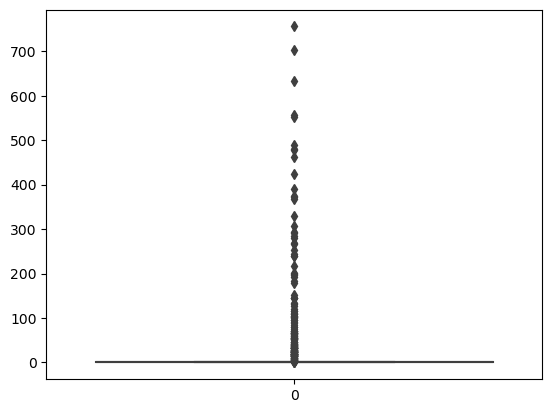

In [ ]:
sns.boxplot(df_traffic.transactionRevenue)

In [ ]:
df_traffic_copy.sample(5)

,channelGrouping,visitNumber,browser,operatingSystem,isMobile,deviceCategory,continent,country,metro,city,networkDomain,campaign,source,medium,keyword,referralPath,adContent,hits,pageviews,bounces,newVisits,transactionRevenue,year,month,quarterMonth,day,weekday,time_range
4359,4,1,7,9,False,0,2,19,52,295,1144,0,23,5,4,197,11,2,2,0.0,1.0,0.0,2017,3,1,30,3,3
966,4,1,5,1,True,1,3,55,52,295,0,0,23,5,4,197,11,2,2,0.0,1.0,0.0,2017,6,2,17,5,4
436,2,2,5,5,False,0,2,138,45,257,0,0,0,0,85,197,11,4,4,0.0,0.0,0.0,2017,5,2,1,0,3
4554,4,1,5,6,False,0,2,138,45,257,1686,0,23,5,4,197,11,2,2,0.0,1.0,0.0,2016,11,4,4,4,0
10308,4,3,5,1,True,1,4,137,52,295,1567,0,23,5,4,197,11,1,1,1.0,0.0,0.0,2017,2,1,27,0,1


In [ ]:
df_traffic = df_traffic_copy.copy()

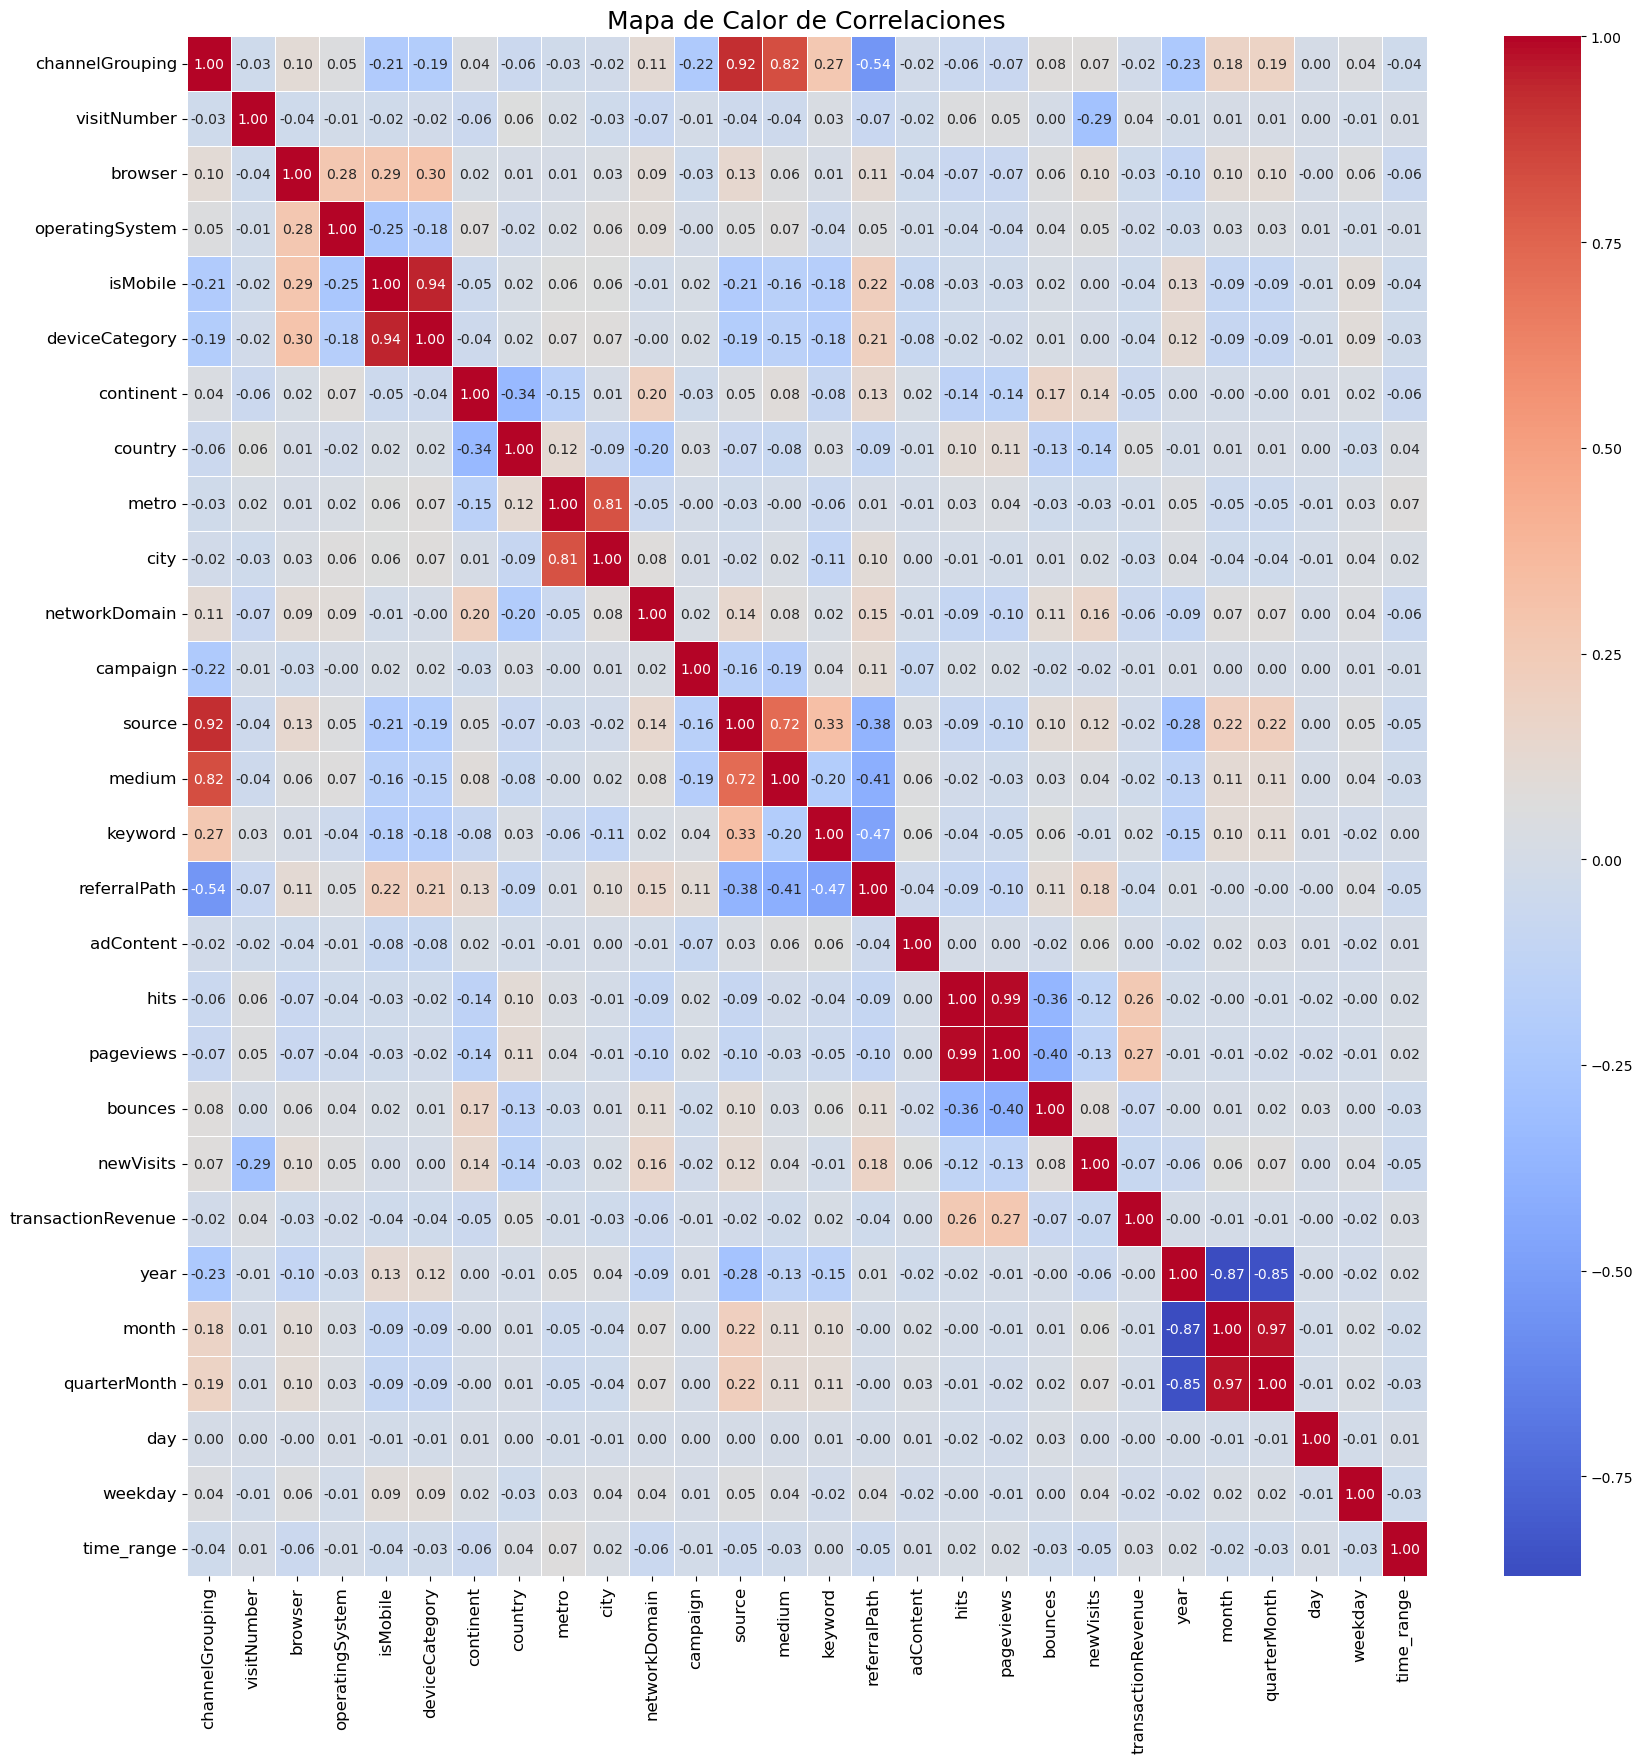

In [ ]:
plt.figure(figsize=(20, 20))  # Ajusta el tamaño de la figura

heatmap = sns.heatmap(df_traffic.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
heatmap.tick_params(axis='both', which='major', labelsize=12)  # Ajustar el tamaño de las etiquetas
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

### Eliminación de variables con mayor correlacion: month, hits, channelGrouping, isMobile, quarterMonth, campaign, metro, bounces, a parte de ser variables que en el análisis EDA resultaron no ser muy crusiales para el modelo.

In [ ]:
columns_target = [
    "month", "hits", "channelGrouping", "isMobile", "quarterMonth", "campaign",  "metro", "bounces"
]
#, "metro", "bounces", "campaign"

df_traffic_copy = df_traffic_copy.drop(columns=columns_target)
df_traffic = df_traffic_copy.copy()

In [ ]:
df_traffic.sample(5)

,visitNumber,browser,operatingSystem,deviceCategory,continent,country,city,networkDomain,source,medium,keyword,referralPath,adContent,pageviews,newVisits,transactionRevenue,year,day,weekday,time_range
2625,1,5,6,0,2,138,295,1608,48,6,85,0,11,4,1.0,0.00,2016,22,1,0
6826,1,5,6,0,2,138,295,0,23,5,4,197,11,3,1.0,0.00,2017,5,4,3
9124,1,5,5,0,3,60,265,0,0,0,85,197,11,5,1.0,0.00,2016,15,0,1
6367,5,5,6,0,2,138,172,0,48,6,85,0,11,14,0.0,13.59,2017,22,2,3
3094,1,5,9,0,3,96,295,1567,23,5,4,197,11,1,1.0,0.00,2017,18,2,1


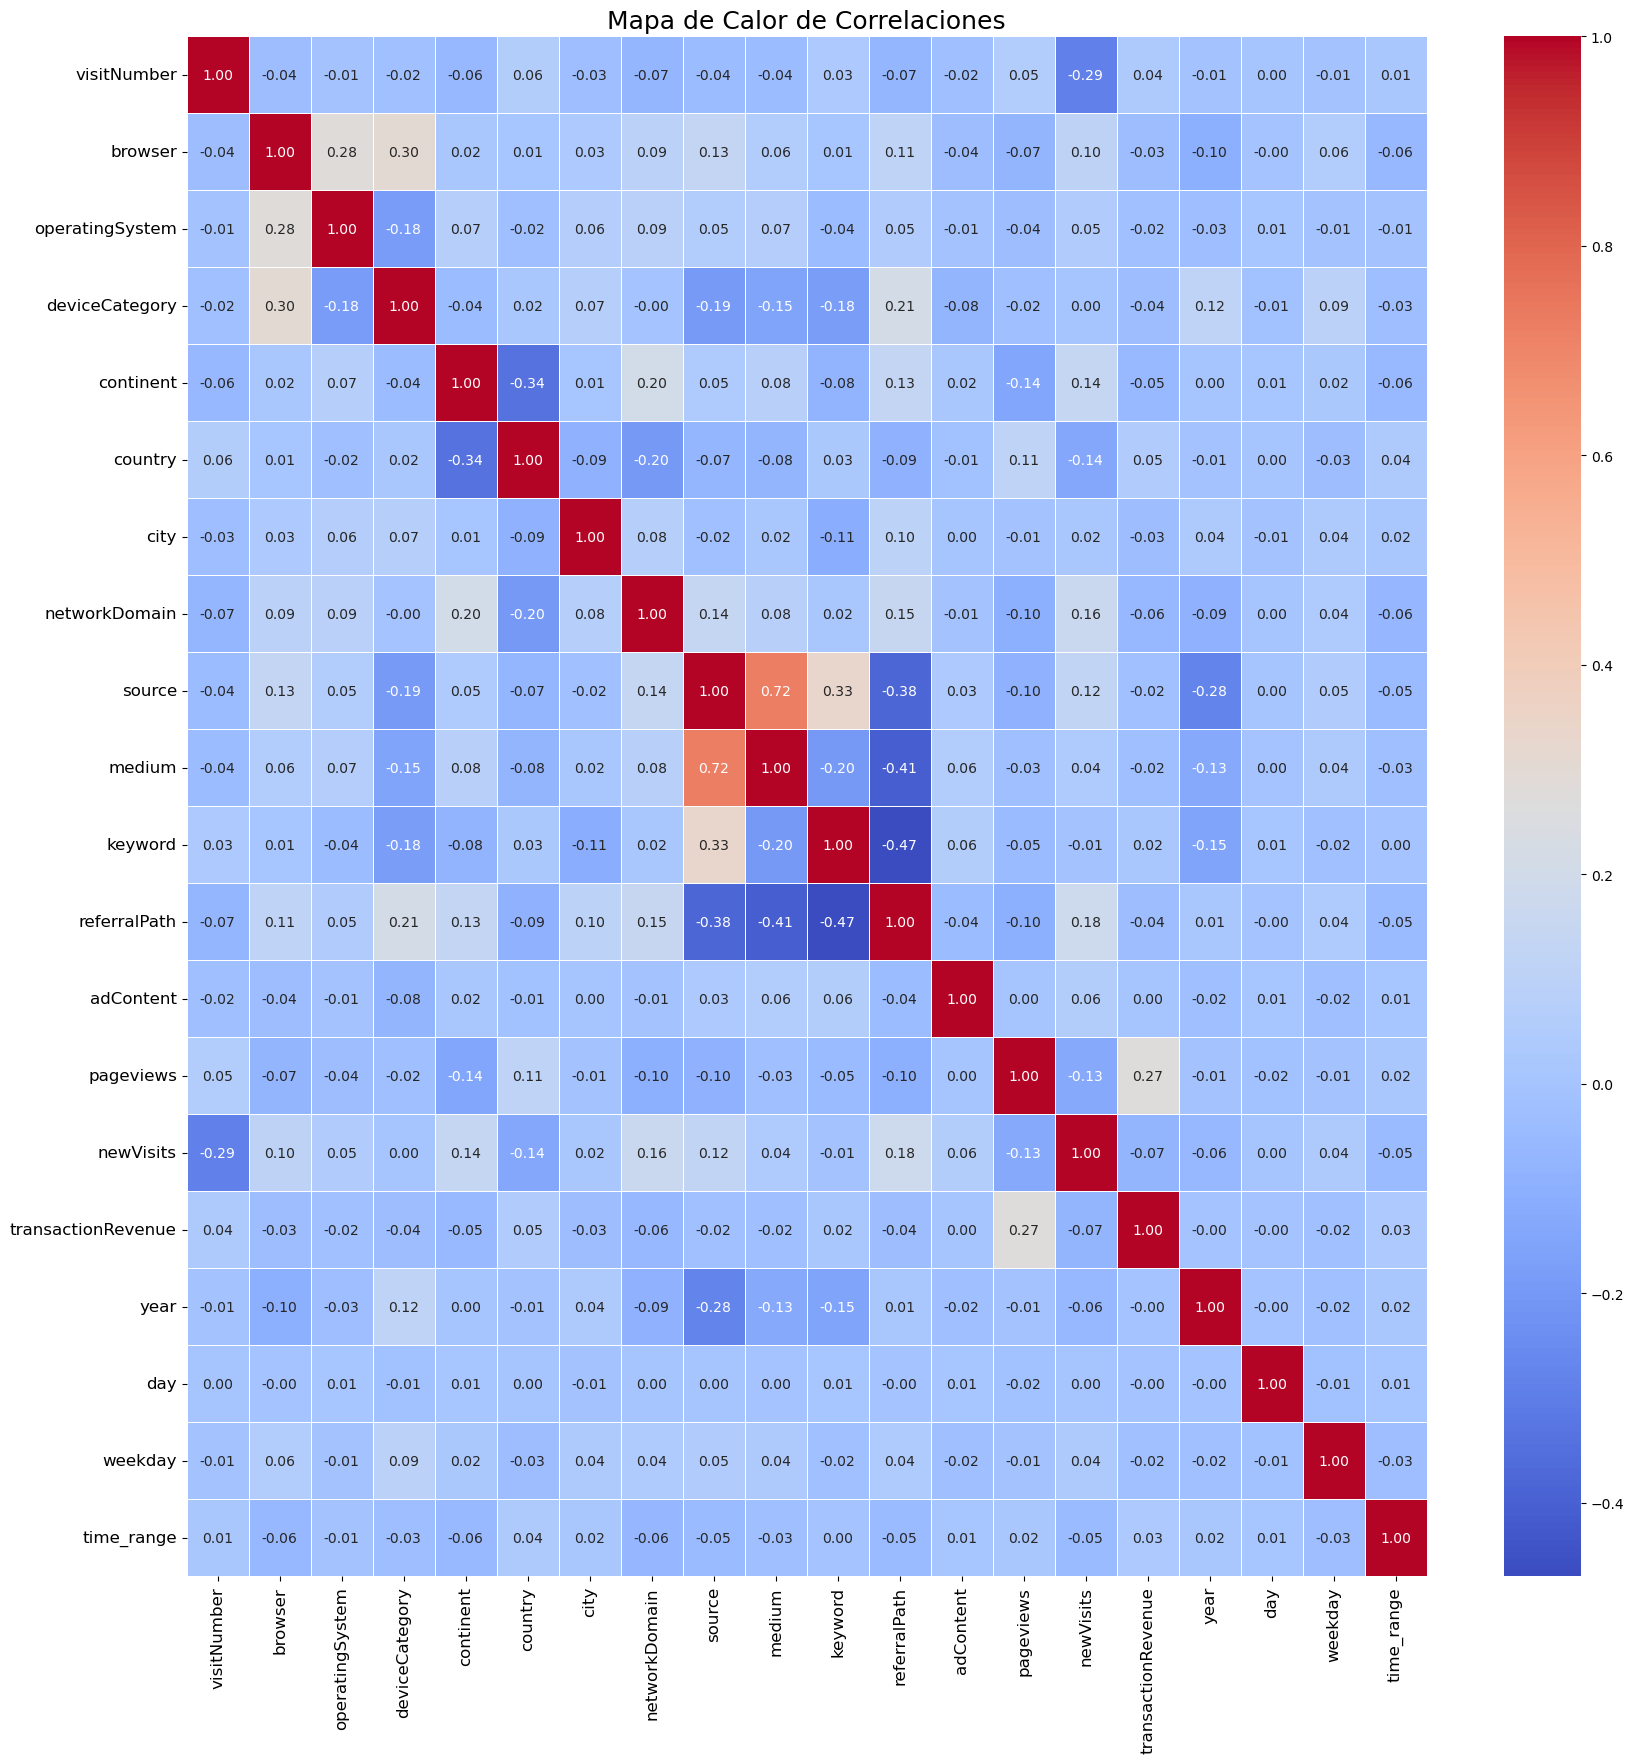

In [ ]:
plt.figure(figsize=(20,20))  # Ajusta el tamaño de la figura

heatmap = sns.heatmap(df_traffic.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
heatmap.tick_params(axis='both', which='major', labelsize=12)  # Ajusta el tamaño de las etiquetas
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

In [ ]:
df_traffic = df_traffic_copy.copy()
df_traffic.to_csv('df_traffic_end.csv', sep=';', index=False)
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitNumber         12283 non-null  int64  
 1   browser             12283 non-null  int32  
 2   operatingSystem     12283 non-null  int32  
 3   deviceCategory      12283 non-null  int32  
 4   continent           12283 non-null  int32  
 5   country             12283 non-null  int32  
 6   city                12283 non-null  int32  
 7   networkDomain       12283 non-null  int32  
 8   source              12283 non-null  int32  
 9   medium              12283 non-null  int32  
 10  keyword             12283 non-null  int32  
 11  referralPath        12283 non-null  int32  
 12  adContent           12283 non-null  int32  
 13  pageviews           12283 non-null  int64  
 14  newVisits           12283 non-null  float64
 15  transactionRevenue  12283 non-null  float64
 16  year